적대적 신경망(GAN)

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

생성자(Generator)

In [ ]:
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
#128 : 임의의 노드 수 (설정 값)/ 7*7 (이미지 최초크기) >> 14*14 >> 28*28 upsampling
generator.add(BatchNormalization())
#배치정규화 : input data를 평균0 분산1이 되게 재배치
generator.add(Reshape((7,7,128)))
generator.add(UpSampling2D()) # 14*14로 변환
generator.add(Conv2D(64, kernel_size=5, padding='same'))
# kernel_size = 5 (5,5)padding='same' : zero padding
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D()) # 28*28로 변환
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh')) #tanh -1 ~ 1 사이로 출력


판별자(discriminator)

In [ ]:
#feature extraction(특징 추출)

discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding='same'))
#strides=2 >> pooling 과정 대체 효과
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))

discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))

discriminator.add(Flatten()) # 2차원 >> 1차원
discriminator.add(Dense(1, activation='sigmoid'))

In [ ]:
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False
#판별자 자신이 학습이 되지 않게 학습 기능을 꺼줌 (***)

## GAN NETWORK (생성자와 판별자 모델 연결)

In [ ]:
ginput = Input(shape = (100,))
#무작위로 100개 벡터값 집어 넣음

# D() : 판별자 G() : 생성자
dis_output = discriminator(generator(ginput))
#생성된 28*28 이미지 >> 판별자의 입력값을 들어감

gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam') # 참/ 거짓 분류
gan.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 28, 28, 1)         865281    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1078146 (4.11 MB)
Trainable params: 852609 (3.25 MB)
Non-trainable params: 225537 (881.00 KB)
_________________________________________________________________


1/1 [==============================] - 0s 396ms/step
epoch: 0 d_loss: 0.7238 g_loss: 0.7390
1/1 [==============================] - 0s 235ms/step


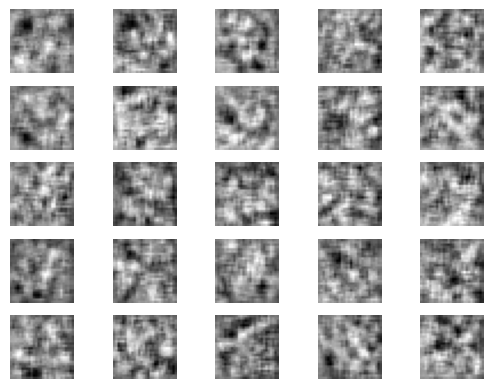

1/1 [==============================] - 0s 21ms/step
epoch: 1 d_loss: 0.4414 g_loss: 0.5627
1/1 [==============================] - 0s 25ms/step
epoch: 2 d_loss: 0.3744 g_loss: 0.2219
1/1 [==============================] - 0s 20ms/step
epoch: 3 d_loss: 0.4683 g_loss: 0.0505
1/1 [==============================] - 0s 24ms/step
epoch: 4 d_loss: 0.6010 g_loss: 0.0392
1/1 [==============================] - 0s 23ms/step
epoch: 5 d_loss: 0.6857 g_loss: 0.1012
1/1 [==============================] - 0s 18ms/step
epoch: 6 d_loss: 0.5674 g_loss: 0.2605
1/1 [==============================] - 0s 19ms/step
epoch: 7 d_loss: 0.5138 g_loss: 0.5785
1/1 [==============================] - 0s 22ms/step
epoch: 8 d_loss: 0.6205 g_loss: 0.6637
1/1 [==============================] - 0s 22ms/step
epoch: 9 d_loss: 0.5864 g_loss: 0.6132
1/1 [==============================] - 0s 23ms/step
epoch: 10 d_loss: 0.5152 g_loss: 0.6306
1/1 [==============================] - 0s 21ms/step
epoch: 11 d_loss: 0.4476 g_loss: 0.73

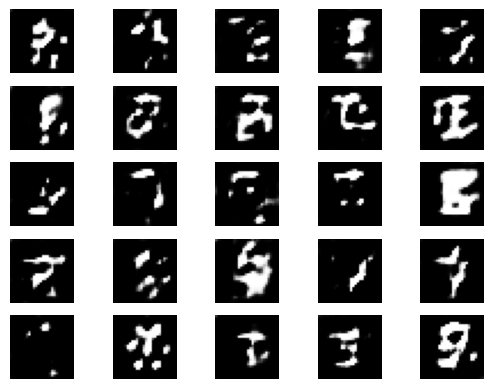

1/1 [==============================] - 0s 20ms/step
epoch: 201 d_loss: 0.3191 g_loss: 2.0493
1/1 [==============================] - 0s 21ms/step
epoch: 202 d_loss: 0.2593 g_loss: 2.1008
1/1 [==============================] - 0s 18ms/step
epoch: 203 d_loss: 0.1658 g_loss: 2.2631
1/1 [==============================] - 0s 19ms/step
epoch: 204 d_loss: 0.3589 g_loss: 1.9286
1/1 [==============================] - 0s 21ms/step
epoch: 205 d_loss: 0.4797 g_loss: 2.1020
1/1 [==============================] - 0s 19ms/step
epoch: 206 d_loss: 0.5965 g_loss: 1.6900
1/1 [==============================] - 0s 18ms/step
epoch: 207 d_loss: 0.6365 g_loss: 1.6919
1/1 [==============================] - 0s 21ms/step
epoch: 208 d_loss: 0.4437 g_loss: 1.9144
1/1 [==============================] - 0s 20ms/step
epoch: 209 d_loss: 0.6745 g_loss: 1.8397
1/1 [==============================] - 0s 20ms/step
epoch: 210 d_loss: 0.4982 g_loss: 1.8904
1/1 [==============================] - 0s 19ms/step
epoch: 211 d_loss:

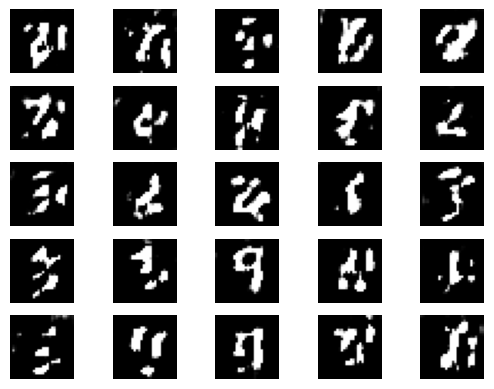

1/1 [==============================] - 0s 18ms/step
epoch: 401 d_loss: 0.2830 g_loss: 2.3430
1/1 [==============================] - 0s 19ms/step
epoch: 402 d_loss: 0.4633 g_loss: 2.2234
1/1 [==============================] - 0s 19ms/step
epoch: 403 d_loss: 0.3339 g_loss: 2.2164
1/1 [==============================] - 0s 19ms/step
epoch: 404 d_loss: 0.3599 g_loss: 2.0902
1/1 [==============================] - 0s 20ms/step
epoch: 405 d_loss: 0.3135 g_loss: 2.3693
1/1 [==============================] - 0s 18ms/step
epoch: 406 d_loss: 0.3021 g_loss: 1.9413
1/1 [==============================] - 0s 19ms/step
epoch: 407 d_loss: 0.3712 g_loss: 2.0910
1/1 [==============================] - 0s 20ms/step
epoch: 408 d_loss: 0.3210 g_loss: 1.9065
1/1 [==============================] - 0s 20ms/step
epoch: 409 d_loss: 0.4850 g_loss: 2.0711
1/1 [==============================] - 0s 20ms/step
epoch: 410 d_loss: 0.4220 g_loss: 2.0947
1/1 [==============================] - 0s 19ms/step
epoch: 411 d_loss:

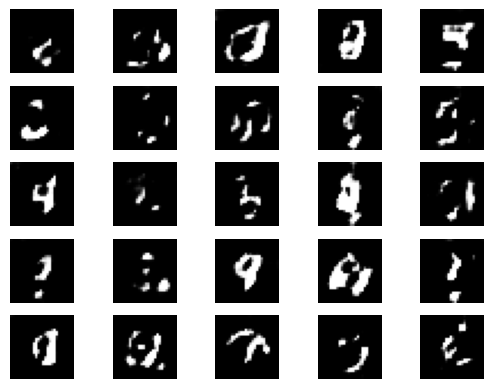

1/1 [==============================] - 0s 19ms/step
epoch: 601 d_loss: 0.2817 g_loss: 2.7914
1/1 [==============================] - 0s 20ms/step
epoch: 602 d_loss: 0.2933 g_loss: 2.4288
1/1 [==============================] - 0s 19ms/step
epoch: 603 d_loss: 0.3412 g_loss: 2.4047
1/1 [==============================] - 0s 19ms/step
epoch: 604 d_loss: 0.2574 g_loss: 3.2476
1/1 [==============================] - 0s 19ms/step
epoch: 605 d_loss: 0.2898 g_loss: 3.1858
1/1 [==============================] - 0s 18ms/step
epoch: 606 d_loss: 0.1734 g_loss: 3.7058
1/1 [==============================] - 0s 19ms/step
epoch: 607 d_loss: 0.2972 g_loss: 3.3218
1/1 [==============================] - 0s 18ms/step
epoch: 608 d_loss: 0.3205 g_loss: 2.7109
1/1 [==============================] - 0s 18ms/step
epoch: 609 d_loss: 0.2231 g_loss: 2.6845
1/1 [==============================] - 0s 18ms/step
epoch: 610 d_loss: 0.2355 g_loss: 2.8350
1/1 [==============================] - 0s 19ms/step
epoch: 611 d_loss:

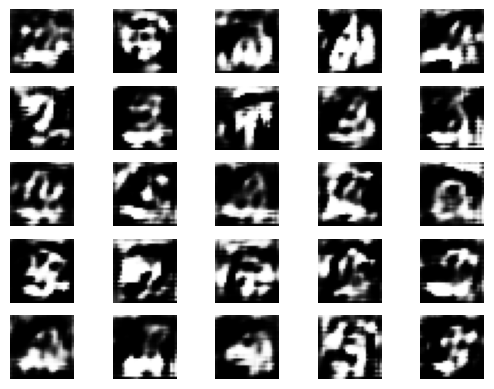

1/1 [==============================] - 0s 20ms/step
epoch: 801 d_loss: 0.3947 g_loss: 2.2684
1/1 [==============================] - 0s 19ms/step
epoch: 802 d_loss: 0.3502 g_loss: 2.1176
1/1 [==============================] - 0s 20ms/step
epoch: 803 d_loss: 0.4515 g_loss: 1.9270
1/1 [==============================] - 0s 19ms/step
epoch: 804 d_loss: 0.3913 g_loss: 1.8201
1/1 [==============================] - 0s 19ms/step
epoch: 805 d_loss: 0.2507 g_loss: 1.8759
1/1 [==============================] - 0s 18ms/step
epoch: 806 d_loss: 0.4565 g_loss: 1.8620
1/1 [==============================] - 0s 19ms/step
epoch: 807 d_loss: 0.3607 g_loss: 1.6747
1/1 [==============================] - 0s 19ms/step
epoch: 808 d_loss: 0.3094 g_loss: 1.9941
1/1 [==============================] - 0s 22ms/step
epoch: 809 d_loss: 0.3281 g_loss: 2.0685
1/1 [==============================] - 0s 19ms/step
epoch: 810 d_loss: 0.5552 g_loss: 2.0425
1/1 [==============================] - 0s 19ms/step
epoch: 811 d_loss:

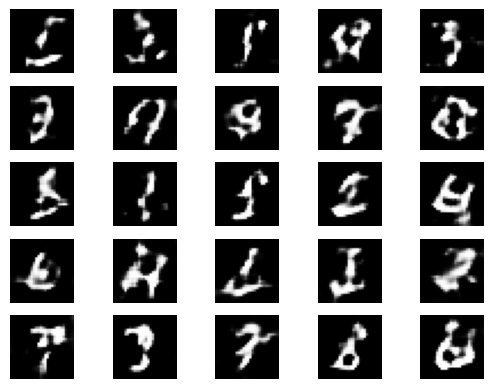

1/1 [==============================] - 0s 20ms/step
epoch: 1001 d_loss: 0.3624 g_loss: 1.7370
1/1 [==============================] - 0s 20ms/step
epoch: 1002 d_loss: 0.3434 g_loss: 2.1677
1/1 [==============================] - 0s 19ms/step
epoch: 1003 d_loss: 0.4108 g_loss: 2.1133
1/1 [==============================] - 0s 19ms/step
epoch: 1004 d_loss: 0.4850 g_loss: 1.8103
1/1 [==============================] - 0s 19ms/step
epoch: 1005 d_loss: 0.3840 g_loss: 1.9094
1/1 [==============================] - 0s 19ms/step
epoch: 1006 d_loss: 0.3476 g_loss: 1.8006
1/1 [==============================] - 0s 19ms/step
epoch: 1007 d_loss: 0.3398 g_loss: 1.8056
1/1 [==============================] - 0s 19ms/step
epoch: 1008 d_loss: 0.2627 g_loss: 2.0862
1/1 [==============================] - 0s 18ms/step
epoch: 1009 d_loss: 0.3410 g_loss: 1.9603
1/1 [==============================] - 0s 18ms/step
epoch: 1010 d_loss: 0.2976 g_loss: 1.8872
1/1 [==============================] - 0s 20ms/step
epoch: 1

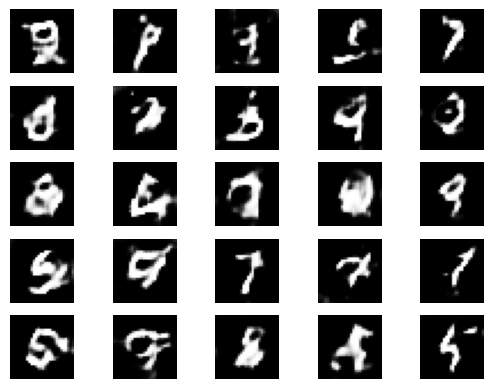

1/1 [==============================] - 0s 21ms/step
epoch: 1201 d_loss: 0.3555 g_loss: 2.4589
1/1 [==============================] - 0s 19ms/step
epoch: 1202 d_loss: 0.4445 g_loss: 2.1609
1/1 [==============================] - 0s 20ms/step
epoch: 1203 d_loss: 0.4910 g_loss: 2.3834
1/1 [==============================] - 0s 19ms/step
epoch: 1204 d_loss: 0.3612 g_loss: 2.2450
1/1 [==============================] - 0s 20ms/step
epoch: 1205 d_loss: 0.3736 g_loss: 1.8225
1/1 [==============================] - 0s 19ms/step
epoch: 1206 d_loss: 0.3690 g_loss: 2.0605
1/1 [==============================] - 0s 19ms/step
epoch: 1207 d_loss: 0.5225 g_loss: 2.1122
1/1 [==============================] - 0s 19ms/step
epoch: 1208 d_loss: 0.3017 g_loss: 2.4754
1/1 [==============================] - 0s 19ms/step
epoch: 1209 d_loss: 0.3792 g_loss: 1.9125
1/1 [==============================] - 0s 20ms/step
epoch: 1210 d_loss: 0.4426 g_loss: 1.8476
1/1 [==============================] - 0s 19ms/step
epoch: 1

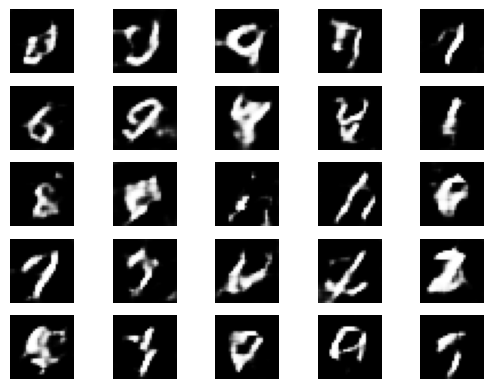

1/1 [==============================] - 0s 19ms/step
epoch: 1401 d_loss: 0.6094 g_loss: 1.0947
1/1 [==============================] - 0s 20ms/step
epoch: 1402 d_loss: 0.5510 g_loss: 1.3027
1/1 [==============================] - 0s 19ms/step
epoch: 1403 d_loss: 0.4618 g_loss: 1.5002
1/1 [==============================] - 0s 19ms/step
epoch: 1404 d_loss: 0.4586 g_loss: 1.7717
1/1 [==============================] - 0s 18ms/step
epoch: 1405 d_loss: 0.5510 g_loss: 1.9089
1/1 [==============================] - 0s 18ms/step
epoch: 1406 d_loss: 0.5413 g_loss: 1.8965
1/1 [==============================] - 0s 18ms/step
epoch: 1407 d_loss: 0.4606 g_loss: 1.6049
1/1 [==============================] - 0s 21ms/step
epoch: 1408 d_loss: 0.3470 g_loss: 1.9582
1/1 [==============================] - 0s 19ms/step
epoch: 1409 d_loss: 0.3679 g_loss: 1.7696
1/1 [==============================] - 0s 19ms/step
epoch: 1410 d_loss: 0.4163 g_loss: 1.7334
1/1 [==============================] - 0s 19ms/step
epoch: 1

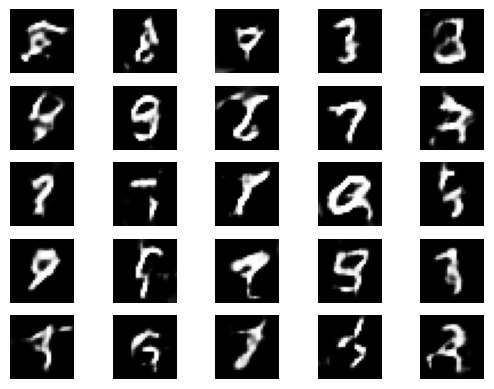

1/1 [==============================] - 0s 22ms/step
epoch: 1601 d_loss: 0.4426 g_loss: 1.9700
1/1 [==============================] - 0s 20ms/step
epoch: 1602 d_loss: 0.4948 g_loss: 1.9664
1/1 [==============================] - 0s 20ms/step
epoch: 1603 d_loss: 0.4707 g_loss: 1.7565
1/1 [==============================] - 0s 22ms/step
epoch: 1604 d_loss: 0.3805 g_loss: 1.7409
1/1 [==============================] - 0s 21ms/step
epoch: 1605 d_loss: 0.6587 g_loss: 1.3289
1/1 [==============================] - 0s 20ms/step
epoch: 1606 d_loss: 0.4796 g_loss: 1.2435
1/1 [==============================] - 0s 20ms/step
epoch: 1607 d_loss: 0.4577 g_loss: 1.4950
1/1 [==============================] - 0s 20ms/step
epoch: 1608 d_loss: 0.4368 g_loss: 1.7628
1/1 [==============================] - 0s 20ms/step
epoch: 1609 d_loss: 0.3438 g_loss: 1.9840
1/1 [==============================] - 0s 21ms/step
epoch: 1610 d_loss: 0.3812 g_loss: 2.0466
1/1 [==============================] - 0s 20ms/step
epoch: 1

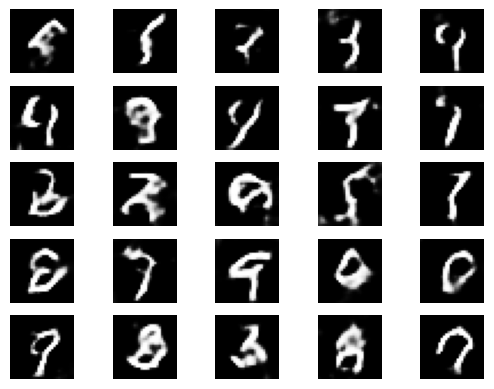

1/1 [==============================] - 0s 19ms/step
epoch: 1801 d_loss: 0.6557 g_loss: 1.3448
1/1 [==============================] - 0s 19ms/step
epoch: 1802 d_loss: 0.6989 g_loss: 1.2524
1/1 [==============================] - 0s 19ms/step
epoch: 1803 d_loss: 0.6289 g_loss: 1.6680
1/1 [==============================] - 0s 18ms/step
epoch: 1804 d_loss: 0.4806 g_loss: 1.4811
1/1 [==============================] - 0s 18ms/step
epoch: 1805 d_loss: 0.5758 g_loss: 1.4356
1/1 [==============================] - 0s 18ms/step
epoch: 1806 d_loss: 0.5326 g_loss: 1.5491
1/1 [==============================] - 0s 20ms/step
epoch: 1807 d_loss: 0.5888 g_loss: 1.3226
1/1 [==============================] - 0s 19ms/step
epoch: 1808 d_loss: 0.5927 g_loss: 1.3586
1/1 [==============================] - 0s 20ms/step
epoch: 1809 d_loss: 0.5759 g_loss: 1.4317
1/1 [==============================] - 0s 19ms/step
epoch: 1810 d_loss: 0.4061 g_loss: 1.4921
1/1 [==============================] - 0s 19ms/step
epoch: 1

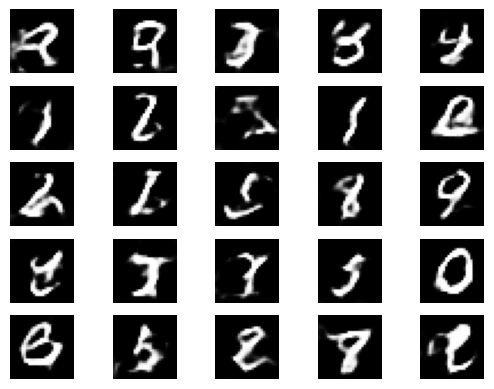

In [ ]:
def gan_train(epoch, batch_size, saving_interval):
    #MNIST 데이터 가져옴 (train data만)
    (x_train, _), (_,_) = mnist.load_data()
    #mnist 데이터 사용하되, x_train(이미지), y_train(라벨:이미지 )
    #이미지만 사용하기 때문에 x_train만 불러옴

    x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32') # 실수 변환 #28*28사이즈의 흑백 이미지 60000만장
    x_train = (x_train - 127.5) / 127.5 #픽셀값 0~255 사이 값 >> tanh(y값 -1~1값) 정규화

    #batch_size : 한번에 몇개의 실제 이미지 (true) 와 가상 이미지(fake)를 판별자에 넣을지 결정

    #2차원으로
    true = np.ones((batch_size,1)) # 1
    fake = np.zeros((batch_size,1)) # 0

    for i in range(epoch):
        #실제 데이터를 판별자에 입력하는 부분
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        # 0 ~ x_train.shape[0]까지 숫자중 하나를 무작위 추출 batch_size 만큼 반복
        imgs = x_train[idx]
        #생성한 이미지와 모두 참(1)에 놓음 >> 여기서 차이(오차) 발생하면 loss(손실)
        d_loss_real = discriminator.train_on_batch(imgs, true)

        #가상 이미지를 판별자에 입력
        noise = np.random.normal(0, 1, (batch_size, 100)) #0에서 1까지 실수 중 batch_size만큼 100열을 뽑아라
        gen_imgs = generator.predict(noise) #생상된 가상이미지를 생성자에 입력(예측)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake) #만들어진 가상이미지와 fake배열 라벨이 붙음

        #판별자와 생성자의 오차를 계산
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) #d_loss_real, d_loss_fake의 평균 >> 판별자 오차
        g_loss = gan.train_on_batch(noise, true) #생성자 오차

        print('epoch: %d' %i, 'd_loss: %.4f' %d_loss, 'g_loss: %.4f' %g_loss)

        #중간과정 이미지로 저장
        if i % saving_interval == 0:
            noise = np.random.normal(0, 1, (25, 100)) # 0에서 1사이의 25개의 샘플의 차원100 뽑기
            gen_imgs = generator.predict(noise)

            #rescale image 0-1
            gen_imgs = 0.5 * gen_imgs + 0.5

            fig, axs = plt.subplots(5,5)
            count = 0
            for j in range(5):
                for k in range(5):
                    axs[j,k].imshow(gen_imgs[count, :,:,0], cmap='gray') # 모든 행과 열의 이미지 count수와 1번째 채널 보여줌
                    axs[j,k].axis('off')
                    count += 1
            plt.show()
            fig.savefig("/content/drive/MyDrive/딥러닝/data/gan_images/gan_mnist_%d.png" %i)

gan_train(2001, 32, 200)
